<a href="https://colab.research.google.com/github/mannatpannu/Python-/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Boston Housing Price Prediction - Beginner Assignment
# Simple and Multiple Linear Regression

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(" BOSTON HOUSING PRICE PREDICTION")
print("=" * 50)

 BOSTON HOUSING PRICE PREDICTION


In [9]:
import seaborn as sns

In [35]:
print("\n STEP 1: Loading Data...")


 STEP 1: Loading Data...


In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
california_housing = fetch_california_housing()

In [5]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [6]:
df['MedHouseVal'] = california_housing.target

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


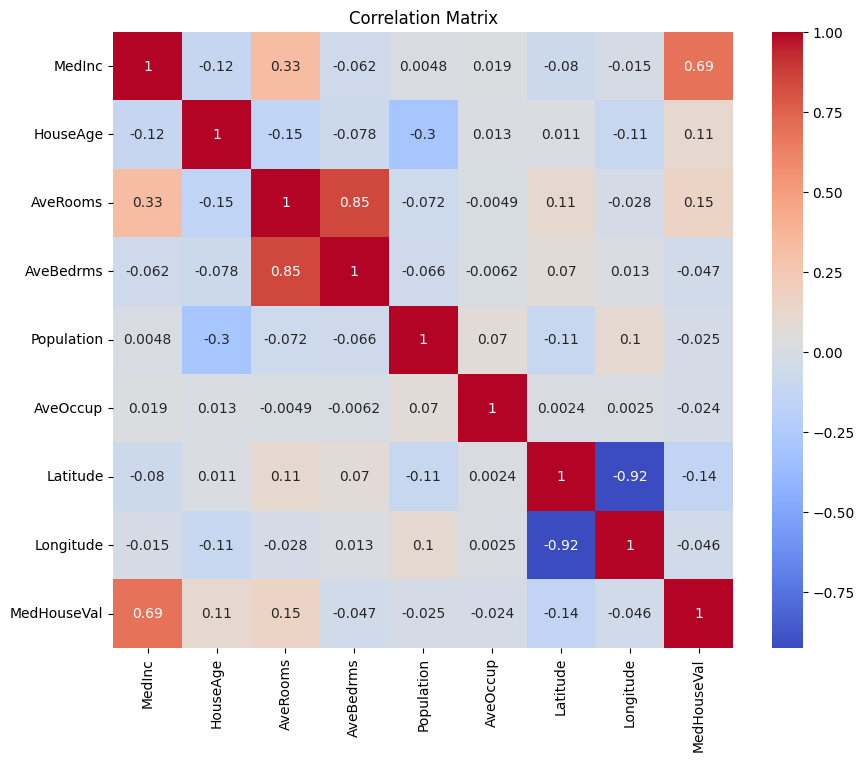

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [12]:
X = df[['MedInc']]

In [13]:
y = df['MedHouseVal']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [19]:
print(f"Simple Linear Regression (MedInc):")
print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Simple Linear Regression (MedInc):
R²: 0.4589, MAE: 0.6299, RMSE: 0.8421


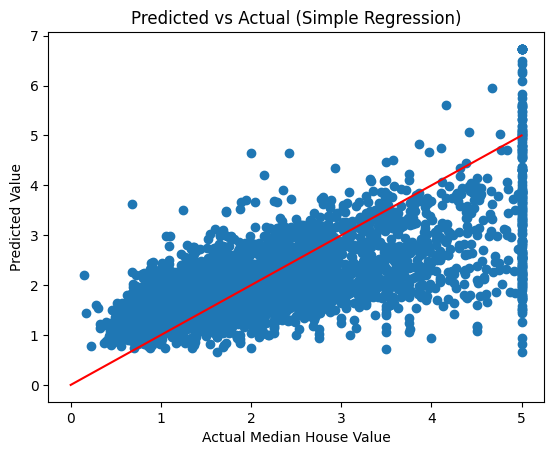

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs Actual (Simple Regression)")
plt.plot([0, 5], [0, 5], color='red')
plt.show()

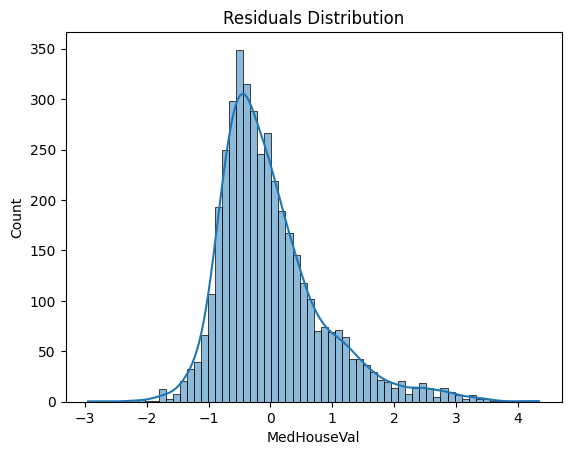

In [21]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [22]:
top_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False)[1:6].index.tolist()
print("Top correlated features:", top_features)

Top correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


In [23]:
X_multi = df[top_features]

In [24]:
y = df['MedHouseVal']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [26]:
multi_lr = LinearRegression()

In [27]:
multi_lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_multi = multi_lr.predict(X_test)

In [29]:
r2_multi = r2_score(y_test, y_pred_multi)

In [30]:
mae_multi = mean_absolute_error(y_test, y_pred_multi)

In [31]:
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

In [32]:
print(f"Multiple Linear Regression:")
print(f"R²: {r2_multi:.4f}, MAE: {mae_multi:.4f}, RMSE: {rmse_multi:.4f}")

Multiple Linear Regression:
R²: 0.5129, MAE: 0.5797, RMSE: 0.7989


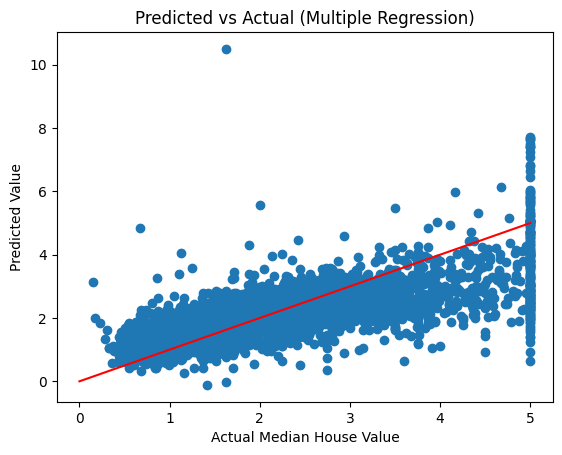

In [33]:
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs Actual (Multiple Regression)")
plt.plot([0, 5], [0, 5], color='red')
plt.show()

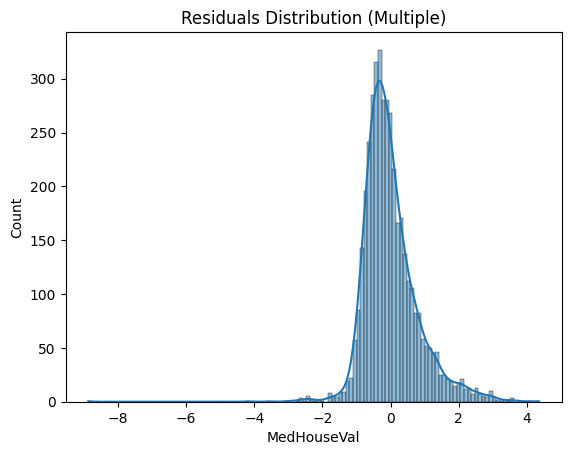

In [34]:
residuals_multi = y_test - y_pred_multi
sns.histplot(residuals_multi, kde=True)
plt.title("Residuals Distribution (Multiple)")
plt.show()